In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from utils import *

In [11]:
tools=["optitype","arcas",'rna2hla',"hlavbseq",'hlaminer']
my_order=["Optitype","arcasHLA","RNA2HLA","HLA-vbseq",'HLAminer']
# need t1k, hla-hd, hisat,seq2hla,hlaforest,phlat
sns.set_context("paper")
sns.set_style("white")
sns.set(font_scale=2)


In [12]:
rawdata = list()

#datasets=["1","d2","d3","d4","d5","d6"]
for t in tools:
    total = []
    for d in range(1,8):
        gs=pd.read_csv("../datasets/"+str(d)+"_gs.csv")
        pre=pd.read_csv("../results/standard/"+str(t)+"_d"+str(d)+".csv")
            
        ret=get_accuracy_counts(pre,gs)
        print(t,"d"+str(d),ret)
        total.append(ret)
    rawdata.append(total)

optitype d1 ([10, 0], [33, 0], [2897, 0], [0, 1960])
optitype d2 ([0, 0], [0, 0], [0, 0], [0, 172])
optitype d3 ([8, 0], [10, 0], [282, 0], [0, 0])
optitype d4 ([0, 0], [0, 0], [0, 0], [0, 28])
optitype d5 ([0, 0], [0, 0], [8, 0], [0, 0])
optitype d6 ([0, 0], [0, 0], [4, 0], [0, 0])
optitype d7 ([49, 0], [5, 0], [30, 0], [36, 80])
arcas d1 ([38, 6], [144, 127], [2758, 1827], [0, 0])
arcas d2 ([0, 4], [0, 5], [0, 163], [0, 0])
arcas d3 ([9, 0], [88, 0], [203, 0], [0, 0])
arcas d4 ([0, 0], [0, 0], [0, 4], [0, 24])
arcas d5 ([0, 0], [0, 0], [8, 0], [0, 0])
arcas d6 ([0, 0], [0, 0], [4, 0], [0, 0])
arcas d7 ([23, 14], [10, 19], [15, 15], [72, 32])
rna2hla d1 ([35, 114], [104, 192], [2801, 1654], [0, 0])
rna2hla d2 ([0, 14], [0, 27], [0, 131], [0, 0])
rna2hla d3 ([14, 0], [25, 0], [261, 0], [0, 0])
rna2hla d4 ([0, 7], [0, 1], [0, 6], [0, 14])
rna2hla d5 ([0, 0], [2, 0], [6, 0], [0, 0])
rna2hla d6 ([0, 0], [1, 0], [3, 0], [0, 0])
rna2hla d7 ([82, 28], [8, 10], [18, 32], [12, 10])
hlavbseq d1

# Plotting

## Bar plot of accuracy with no calls included

In [13]:
# Calculating Class I and Class II Accuracy -- NO CALLS INCLUDED
data = np.array(rawdata)

classIresults = []
classIIresults = []
allresults = []

for tool in data:
    r = np.sum(np.array(tool),axis=0)
    allresults.append(r[:,0]+r[:,1])
    classIresults.append(r[:,0])
    classIIresults.append(r[:,1])

# normalizing accuracies to 1
classIresults = np.array(classIresults)
row_sums = classIresults.sum(axis=1)
classIresults = classIresults / row_sums[:, np.newaxis]


classIIresults = np.array(classIIresults)
row_sums = classIIresults.sum(axis=1)
classIIresults = classIIresults / row_sums[:, np.newaxis]

allresults = np.array(allresults)
row_sums = allresults.sum(axis=1)
allresults = allresults / row_sums[:, np.newaxis]


print(classIresults)
print(classIIresults)
print(allresults)

[[0.01986951 0.01423488 0.95521945 0.01067616]
 [0.02075919 0.0717675  0.886121   0.02135231]
 [0.03884935 0.04151839 0.91607355 0.00355872]
 [0.09697509 0.07384342 0.80011862 0.02906287]
 [0.76957295 0.12930012 0.06079478 0.04033215]]
[[0.         0.         0.         1.        ]
 [0.01071429 0.06741071 0.896875   0.025     ]
 [0.07276786 0.10267857 0.81383929 0.01071429]
 [0.90491071 0.028125   0.06428571 0.00267857]
 [0.64107143 0.21071429 0.10133929 0.046875  ]]
[[0.0119387  0.0085531  0.57394868 0.40555952]
 [0.01674982 0.07002851 0.8904134  0.02280827]
 [0.05238774 0.06593015 0.87526728 0.00641483]
 [0.4194583  0.05559515 0.50641483 0.01853172]
 [0.71828225 0.16179615 0.0769779  0.04294369]]


      Tools      zero  two dig accuracy  four dig accuracy
0  optitype  0.011939          0.008553           0.573949
1     arcas  0.016750          0.070029           0.890413
2   rna2hla  0.052388          0.065930           0.875267
3  hlavbseq  0.419458          0.055595           0.506415
4  hlaminer  0.718282          0.161796           0.076978


/tmp/ipykernel_103016/2581238536.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=my_order, rotation = 45)


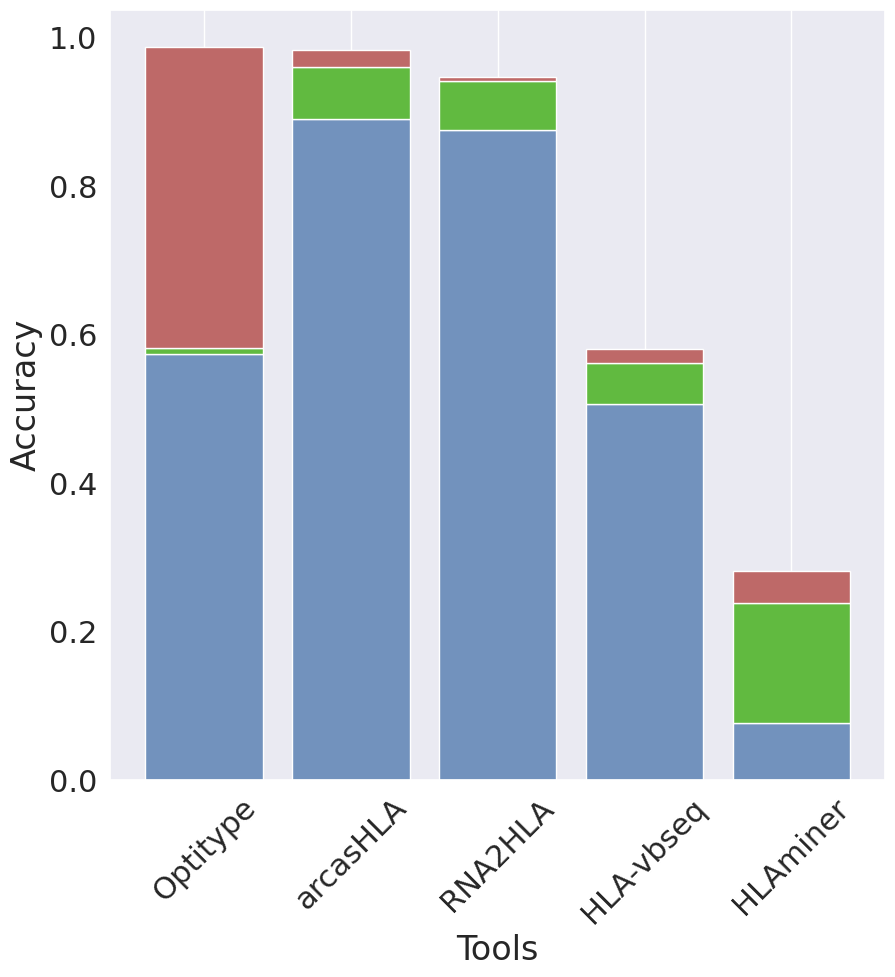

In [14]:
# combined accuracy bar plot (not split by class 1 and class 2) -- NO CALLS INCLUDED

combined_df = pd.DataFrame({'Tools': tools, 'zero': allresults[:, 0],'two dig accuracy': allresults[:, 1],'four dig accuracy': allresults[:, 2]})
print(combined_df)

ax = sns.barplot(data=combined_df,x='Tools',y='four dig accuracy',color = palette[2] )
ax.bar(tools,allresults[:, 1],bottom=allresults[:, 2], color= palette[1]  )
ax.bar(tools,allresults[:, 3],bottom=allresults[:, 2]+allresults[:, 1], color= palette[0] )

ax.set_xticklabels(labels=my_order, rotation = 45)
ax.set_ylabel("Accuracy")
plt.grid()

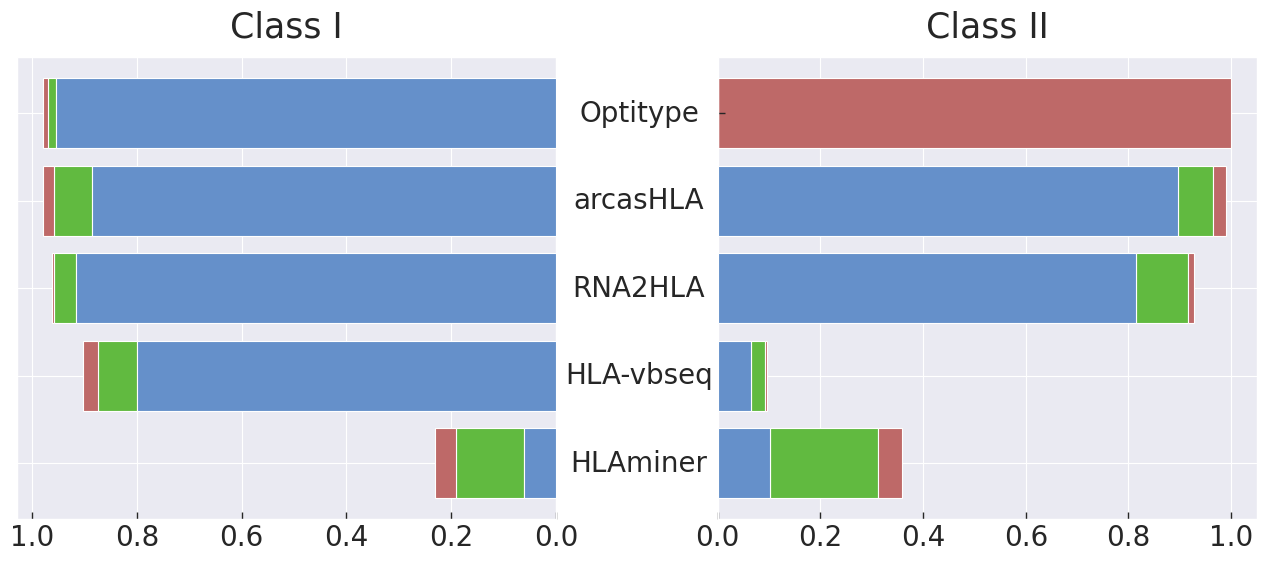

In [17]:
# class1 vs class2 barplot for 4 dig accuracy-- No call excluded

import mpl_toolkits.axisartist as axisartist

title0 = 'Class I'
title1 = 'Class II'

fourdig_I = classIresults[:,2]
fourdig_II = classIIresults[:,2]

twodig_I = classIresults[:,1]
twodig_II = classIIresults[:,1]

nocall_I = classIresults[:,3]
nocall_II = classIIresults[:,3]

# need to set optitype to zero for class II
twodig_II[0]=0
fourdig_II[0]=0
nocall_II[0]=1

sns.set_context("paper")
sns.color_palette("pastel")

#set figure
fig = plt.figure(figsize=(16,6))

#left plot
ax1=fig.add_subplot(121, axes_class = axisartist.Axes)
ax1.barh(my_order, fourdig_I, align='center',zorder=10,color = palette[2])
ax1.barh(my_order,twodig_I,left=fourdig_I, color=palette[1] )
ax1.barh(my_order,nocall_I,left=fourdig_I+twodig_I, color= palette[0] )
ax1.set_title(title0, fontsize=25, pad=15)
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.axis["left",'top'].toggle(all=False)
ax1.yaxis.set_ticklabels([])

#right plot
ax2=fig.add_subplot(122, axes_class = axisartist.Axes,)
ax2.barh(my_order,  fourdig_II, align='center', zorder=10,color = palette[2] )
ax2.barh(my_order,twodig_II,left=fourdig_II, color = palette[1] )
ax2.barh(my_order,nocall_II,left=fourdig_II+twodig_II, color= palette[0] )
ax2.set_title(title1, fontsize=25, pad=15)
ax2.axis["left"].major_ticklabels.set_ha("center")
ax2.axis["left"].major_ticklabels.set_fontsize(20)
ax2.axis["right",'top'].toggle(all=False)
ax2.invert_yaxis()

plt.subplots_adjust(wspace=0.3);
ax2.axis['bottom'].major_ticklabels.set_fontsize(20)
ax1.axis['bottom'].major_ticklabels.set_fontsize(20)

ax1.grid(zorder=0)
ax2.grid(zorder=0)


## Bar plot of accuracy with no calls EXcluded

In [7]:
# Calculating Class I and Class II Accuracy -- NO CALLS excluded
data = np.array(rawdata)
subset_data = data[:,:,:3]

classIresults = []
classIIresults = []
allresults = []

for tool in subset_data:
    r = np.sum(np.array(tool),axis=0)
    allresults.append(r[:,0]+r[:,1])
    classIresults.append(r[:,0])
    classIIresults.append(r[:,1])

# normalizing accuracies to 1
classIresults = np.array(classIresults)
row_sums = classIresults.sum(axis=1)
classIresults = classIresults / row_sums[:, np.newaxis]


classIIresults = np.array(classIIresults)
row_sums = classIIresults.sum(axis=1)
classIIresults = classIIresults / row_sums[:, np.newaxis]

allresults = np.array(allresults)
row_sums = allresults.sum(axis=1)
allresults = allresults / row_sums[:, np.newaxis]


print(classIresults)
print(classIIresults)
print(allresults)

[[0.02008393 0.01438849 0.96552758]
 [0.02121212 0.07333333 0.90545455]
 [0.0389881  0.04166667 0.91934524]
 [0.09987783 0.07605376 0.82406842]
 [0.80191595 0.13473424 0.06334981]]
[[       nan        nan        nan]
 [0.01098901 0.06913919 0.91987179]
 [0.07355596 0.10379061 0.82265343]
 [0.90734109 0.02820054 0.06445837]
 [0.67259953 0.22107728 0.10632319]]
[[0.02008393 0.01438849 0.96552758]
 [0.01714077 0.07166302 0.91119621]
 [0.05272597 0.06635581 0.88091822]
 [0.42737836 0.05664488 0.51597676]
 [0.75051201 0.16905604 0.08043195]]


/tmp/ipykernel_103016/2206183277.py:23: RuntimeWarning: invalid value encountered in divide
  classIIresults = classIIresults / row_sums[:, np.newaxis]


      Tools      zero  two dig accuracy  four dig accuracy
0  optitype  0.020084          0.014388           0.965528
1     arcas  0.017141          0.071663           0.911196
2   rna2hla  0.052726          0.066356           0.880918
3  hlavbseq  0.427378          0.056645           0.515977
4  hlaminer  0.750512          0.169056           0.080432


/tmp/ipykernel_103016/1959420644.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=my_order, rotation = 45)


Text(0, 0.5, 'Accuracy')

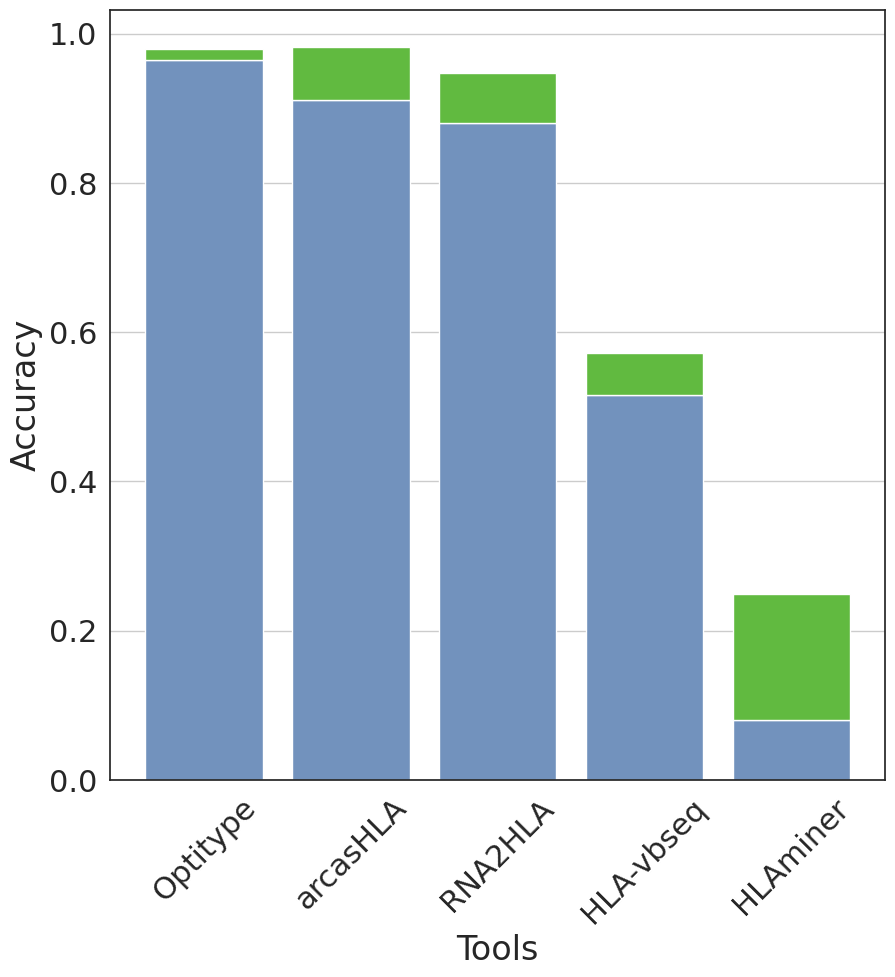

In [8]:
# combined accuracy bar plot (not split by class 1 and class 2) -- NO CALLS EXCLUDED

combined_df = pd.DataFrame({'Tools': tools, 'zero': allresults[:, 0],'two dig accuracy': allresults[:, 1],'four dig accuracy': allresults[:, 2]})
print(combined_df)

sns.set_context("paper")
sns.color_palette("pastel")
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=2)
sns.set_style("white")
plt.grid()

ax = sns.barplot(data=combined_df,x='Tools',y='four dig accuracy',color = palette[2] )
ax.bar(tools,allresults[:, 1],bottom=allresults[:, 2], color=palette[1] )


ax.set_xticklabels(labels=my_order, rotation = 45)
ax.set_ylabel("Accuracy")


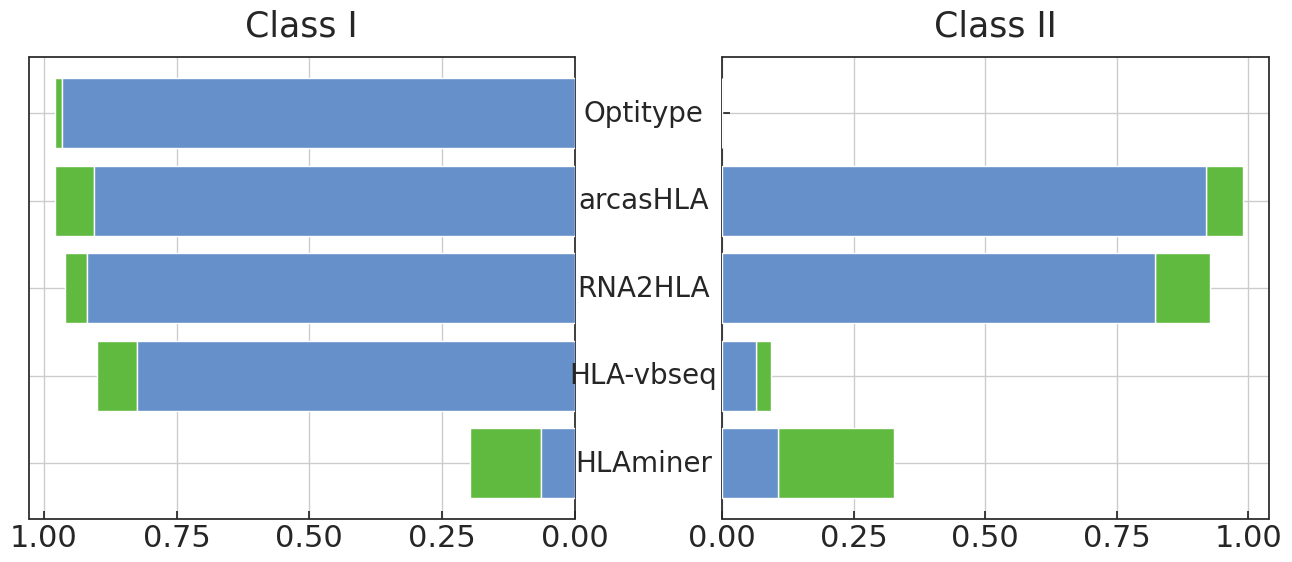

In [9]:
# class1 vs class2 barplot for 4 dig accuracy-- No call excluded

import mpl_toolkits.axisartist as axisartist

title0 = 'Class I'
title1 = 'Class II'

fourdig_I = classIresults[:,2]
fourdig_II = classIIresults[:,2]

twodig_I = classIresults[:,1]
twodig_II = classIIresults[:,1]

# need to set optitype to zero for class II
twodig_II[0]=0
fourdig_II[0]=0



#set figure
fig = plt.figure(figsize=(16,6))

#left plot
ax1=fig.add_subplot(121, axes_class = axisartist.Axes)
ax1.barh(my_order, fourdig_I, align='center',zorder=10,color = palette[2])
ax1.barh(my_order,twodig_I,left=fourdig_I, color=palette[1] )
ax1.set_title(title0, fontsize=25, pad=15)
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.axis["left",'top'].toggle(all=False)
ax1.yaxis.set_ticklabels([])

#right plot
ax2=fig.add_subplot(122, axes_class = axisartist.Axes,)
ax2.barh(my_order,  fourdig_II, align='center', zorder=10,color = palette[2] )
ax2.barh(my_order,twodig_II,left=fourdig_II, color = palette[1] )
ax2.set_title(title1, fontsize=25, pad=15)
ax2.axis["left"].major_ticklabels.set_ha("center")
ax2.axis["left"].major_ticklabels.set_fontsize(20)
ax2.axis["right",'top'].toggle(all=False)
ax2.invert_yaxis()

plt.subplots_adjust(wspace=0.27);

ax1.grid(zorder=0)
ax2.grid(zorder=0)


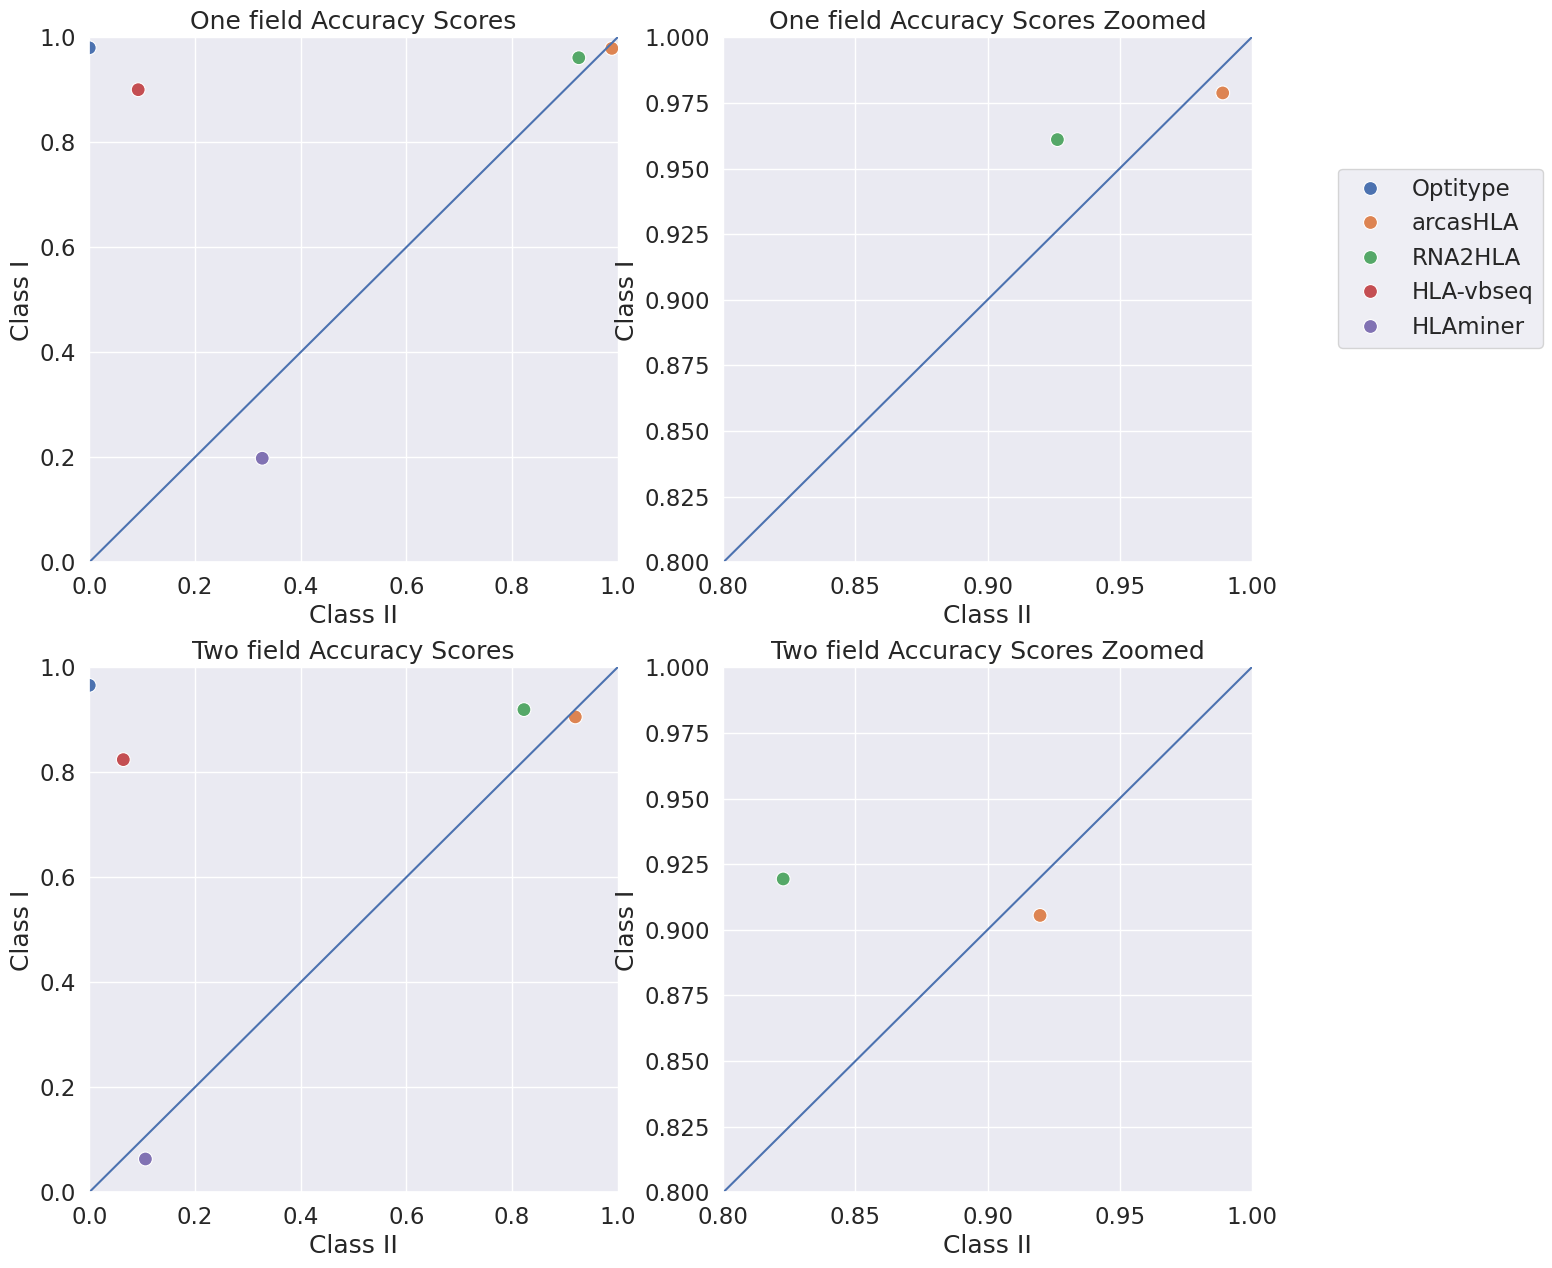

In [10]:
# class1 vs class2 scatterplot -- No call excluded

sns.set(font_scale=1.5)


fig, ax = plt.subplots(2, 2,figsize=(15, 15))
sns.scatterplot(ax=ax[0][0],x=twodig_II+fourdig_II, y=twodig_I+fourdig_I,hue=my_order,legend=False, s=100)
#for i, txt in enumerate(labels):
#    ax[0][0].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[0][0].set_xlim([0,1])
ax[0][0].set_ylim([0,1])
ax[0][0].set_xlabel("Class II")
ax[0][0].set_ylabel("Class I")
ax[0][0].set(title='One field Accuracy Scores')

sns.scatterplot(ax=ax[0][1],x=twodig_II+fourdig_II, y=twodig_I+fourdig_I,hue=my_order,legend=False, s=100)
# for i, txt in enumerate(labels):
#     ax[0][1].annotate(txt, (twodig_II[i], twodig_I[i]))
ax[0][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[0][1].set_xlim([0.80,1])
ax[0][1].set_ylim([0.80,1])
ax[0][1].set_xlabel("Class II")
ax[0][1].set_ylabel("Class I")
ax[0][1].set(title='One field Accuracy Scores Zoomed')

sns.scatterplot(ax=ax[1][0],x=fourdig_II, y=fourdig_I,hue=my_order,legend=False, s=100)
#for i, txt in enumerate(labels):
#    ax[1][0].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][0].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[1][0].set_xlim([0,1])
ax[1][0].set_ylim([0,1])
ax[1][0].set_xlabel("Class II")
ax[1][0].set_ylabel("Class I")
ax[1][0].set(title='Two field Accuracy Scores')

sns.scatterplot(ax=ax[1][1],x=fourdig_II, y=fourdig_I,hue=my_order, s=100)
plt.legend([],[], frameon=False)
# for i, txt in enumerate(labels):
#     ax[1][1].annotate(txt, (fourdig_II[i], fourdig_I[i]))
ax[1][1].plot(np.linspace(0, 1, 100),np.linspace(0, 1, 100))
ax[1][1].set_xlim([0.8,1])
ax[1][1].set_ylim([0.8,1])
ax[1][1].set_xlabel("Class II")
ax[1][1].set_ylabel("Class I")
ax[1][1].set(title='Two field Accuracy Scores Zoomed')
#handles, labels = ax[1][1].get_legend_handles_labels()

fig.legend(*ax[1][1].get_legend_handles_labels(), loc="upper left",ncol=1,bbox_to_anchor=(0.95,0.8))
sns.despine()